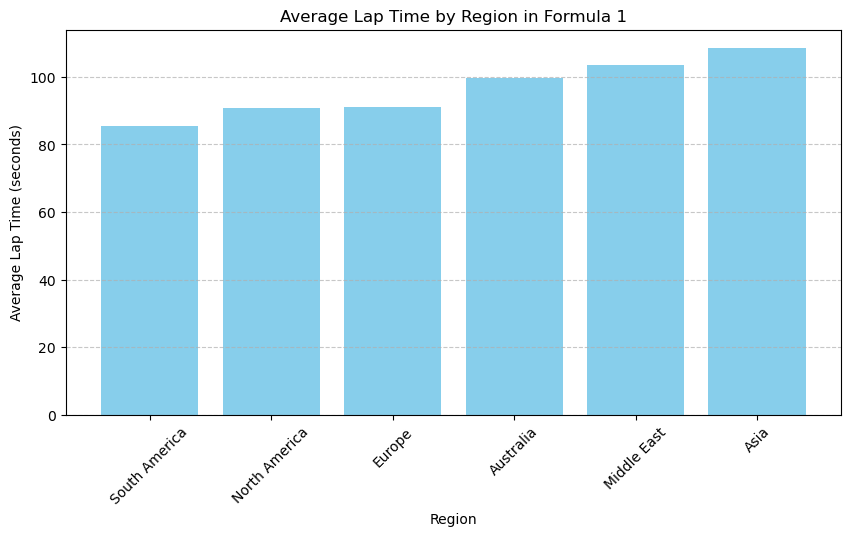

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

lap_times = pd.read_csv("cleaned_lap_times.csv")
races = pd.read_csv("cleaned_races.csv")
circuits = pd.read_csv("cleaned_circuits.csv")

lap_race_df = lap_times.merge(races[['raceId', 'circuitId']], on='raceId', how='left')
lap_race_circuit_df = lap_race_df.merge(circuits[['circuitId', 'circuit_name', 'circuit_country']], on='circuitId', how='left')

lap_race_circuit_df['lap_time_seconds'] = pd.to_timedelta(lap_race_circuit_df['lap_time']).dt.total_seconds()

region_mapping = {
    "Australia": "Australia", "Malaysia": "Asia", "Bahrain": "Middle East", "Spain": "Europe",
    "Turkey": "Europe", "United Kingdom": "Europe", "Germany": "Europe", "Italy": "Europe",
    "Monaco": "Europe", "Canada": "North America", "USA": "North America", "Brazil": "South America",
    "Japan": "Asia", "Singapore": "Asia", "China": "Asia", "Russia": "Europe", "Mexico": "North America",
    "UAE": "Middle East", "France": "Europe", "Saudi Arabia": "Middle East", "Netherlands": "Europe",
    "Argentina": "South America", "South Africa": "Africa", "India": "Asia"
}

lap_race_circuit_df['region'] = lap_race_circuit_df['circuit_country'].map(region_mapping)

lap_race_circuit_df = lap_race_circuit_df.dropna(subset=['region'])

region_avg_lap_time = lap_race_circuit_df.groupby('region')['lap_time_seconds'].mean().sort_values()

plt.figure(figsize=(10, 5))
plt.bar(region_avg_lap_time.index, region_avg_lap_time.values, color='skyblue')
plt.xlabel("Region")
plt.ylabel("Average Lap Time (seconds)")
plt.title("Average Lap Time by Region in Formula 1")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


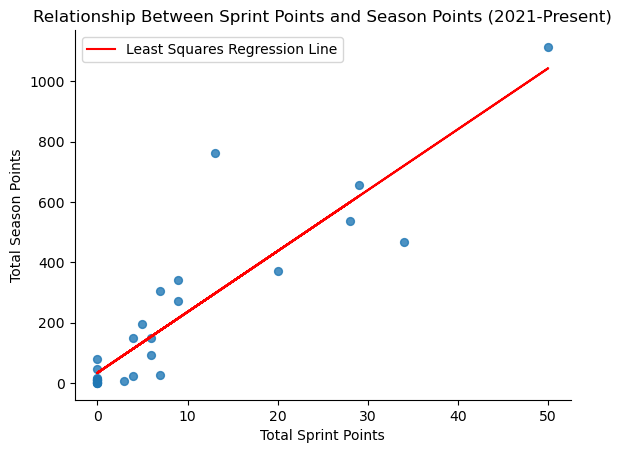

In [71]:
import numpy as np

sprint = pd.read_csv('cleaned_sprint_results.csv')
results = pd.read_csv('cleaned_results.csv')
drivers = pd.read_csv('cleaned_drivers.csv')

races_columns = races[['raceId', 'year']]
results_with_year = results.merge(races_columns, on='raceId', how='inner')

filtered_results = results_with_year[results_with_year['year'] >= 2021]

sprint_columns = sprint[['driverId', 'points']]
results_columns = filtered_results[['driverId', 'points']]
drivers['driver_name'] = drivers['driver_forename'] + ' ' + drivers['driver_surname']
driver_columns = drivers[['driverId', 'driver_name']]

grouped_sprint = sprint_columns.groupby('driverId', as_index=False)['points'].sum()
grouped_results = results_columns.groupby('driverId', as_index=False)['points'].sum()

merged_df = grouped_sprint.merge(grouped_results, on='driverId', how='inner')
merged_df = merged_df.merge(driver_columns, on='driverId', how='inner')
merged_df = merged_df.rename(columns={'points_x': 'sprint_points', 'points_y': 'season_points'})

coefficients = np.polyfit(merged_df['sprint_points'], merged_df['season_points'], 1) #LSRL Code adapted from ChatGpt
m = coefficients[0]
b = coefficients[1]
regression_line = m * merged_df['sprint_points'] + b

merged_df.plot(kind='scatter', x='sprint_points', y='season_points', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title("Relationship Between Sprint Points and Season Points (2021-Present)")
plt.xlabel("Total Sprint Points")
plt.ylabel("Total Season Points")
plt.plot(merged_df['sprint_points'], regression_line, color='red', label='Least Squares Regression Line')
plt.legend()


In [70]:
merged_df.head(10)

,driverId,sprint_points,season_points,driver_name
0,1,13,762.5,Lewis Hamilton
1,4,7,304.0,Fernando Alonso
2,807,3,6.0,Nico Hülkenberg
3,815,29,655.0,Sergio Pérez
4,817,4,148.0,Daniel Ricciardo
5,822,9,271.0,Valtteri Bottas
6,825,4,23.0,Kevin Magnussen
7,830,50,1113.5,Max Verstappen
8,832,34,468.5,Carlos Sainz
9,839,5,196.0,Esteban Ocon
